##### EDA

In [1]:
import torchxrayvision as xrv

C:\Users\Hoo Kai Sng\OneDrive - National University of Singapore\Documents\NUS\CS3244\Project\xrayenv\Lib\site-packages\torchxrayvision\utils.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
d = xrv.datasets.COVID19_Dataset(imgpath="data/images/", csvpath="data/csv/metadata.csv")

In [3]:
img = d[0]['img'][0]
print(f"sample image of shape {img.shape}")
print(f"dataset of length {len(d)}")
print(img)

sample image of shape (888, 882)
dataset of length 535
[[1024.      1015.9686  1007.93726 ... -469.83527 -477.86664 -477.86664]
 [1024.      1024.      1015.9686  ... -493.92938 -493.92938 -493.92938]
 [1024.      1024.      1015.9686  ... -501.96075 -509.99213 -509.99213]
 ...
 [1024.      1024.       983.84314 ... -172.6745  -156.61176 -148.58038]
 [1024.      1024.       983.84314 ... -252.98822 -244.95685 -244.95685]
 [1024.      1024.       983.84314 ... -437.70978 -429.6784  -421.64703]]


##### SummaryWriter

In [1]:
from torch.utils.tensorboard import SummaryWriter
import torchvision
writer1 = SummaryWriter("logs/COVID19_train")
writer2 = SummaryWriter("logs/COVID19_test")

##### Dataloader

In [2]:
from dataLoader import *
from torch.utils.data import DataLoader

C:\Users\Hoo Kai Sng\OneDrive - National University of Singapore\Documents\NUS\CS3244\Project\xrayenv\Lib\site-packages\torchxrayvision\utils.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# train_dataset = Covid19DataSet('train', transform = 'vanilla')
augmented_dataset = Covid19DataSet('train', transform = 'augment')
validation_dataset = Covid19DataSet('val', transform = 'vanilla')
test_dataset = Covid19DataSet('test', transform = 'vanilla')

In [4]:
BATCH_SIZE = 8
train_loader = DataLoader(dataset = augmented_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 4)
validation_loader = DataLoader(dataset = validation_dataset, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4)
test_loader = DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4)

In [5]:
# from PIL import Image
# import torchvision.transforms as transforms
# d = xrv.datasets.COVID19_Dataset(imgpath = "data/images/", csvpath = "data/csv/metadata.csv")
# img = d[0]['img'][0]
# img = img + 1024
# img = np.divide(img, 2048)
# pil = Image.fromarray(img)
# ld = transforms.ToTensor()
# tensor = ld(pil)
# compose = transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.RandomHorizontalFlip(p = 1),
#     transforms.ToTensor(), 
# ])
# tensor2 = compose(pil)
# print(tensor2)

##### Building of model

In [47]:
from models import *

In [48]:
resnet_v = MyResNet18()

In [49]:
densenet_v = MyDenseNet()

##### Training Model

In [12]:
from evaluation import *

In [13]:
resnet = train_model(resnet_v, train_loader, validation_loader, writer1, writer2)

Training model
Epoch [1/5] |Training Loss: 0.7109 | Validation Loss: 0.2629 | Training Acc: 63.86%
Epoch [2/5] |Training Loss: 0.1262 | Validation Loss: 0.2290 | Training Acc: 75.39%
Epoch [3/5] |Training Loss: 0.1400 | Validation Loss: 0.1266 | Training Acc: 76.64%
Epoch [4/5] |Training Loss: 0.2412 | Validation Loss: 0.4939 | Training Acc: 71.96%
Epoch [5/5] |Training Loss: 0.3687 | Validation Loss: 0.8144 | Training Acc: 67.60%
Training completed in 5mins 27.47s
Best Loss: 0.1266 | Best Accuracy: 71%


In [16]:
densenet = train_model(densenet_v, train_loader, validation_loader, writer1, writer2)

Training model
Epoch [1/5] |Training Loss: 0.2698 | Validation Loss: 0.2530 | Training Acc: 69.47%
Epoch [2/5] |Training Loss: 0.3667 | Validation Loss: 0.1652 | Training Acc: 75.08%
Epoch [3/5] |Training Loss: 0.1464 | Validation Loss: 0.4287 | Training Acc: 85.67%
Epoch [4/5] |Training Loss: 0.3886 | Validation Loss: 0.1880 | Training Acc: 78.50%
Epoch [5/5] |Training Loss: 0.2486 | Validation Loss: 0.0988 | Training Acc: 78.50%
Training completed in 6mins 50.86s
Best Loss: 0.0988 | Best Accuracy: 87%


##### Evaluation

In [17]:
recall, prec, t, f, n = get_metrics(resnet, test_loader, writer1)

Precision: 1.0000 | Recall: 0.7470 | Positives: 62 | Negatives: 45 | Total: 107
Time taken: 25.44s


In [18]:
get_metrics(densenet, test_loader, writer1)

Precision: 0.9600 | Recall: 0.8675 | Positives: 75 | Negatives: 32 | Total: 107
Time taken: 28.57s


(0.8674698795180723, 0.96, 75, 32, 107)

##### Visualisation

In [91]:
from explain import *

In [10]:
vanilla_dataset = Covid19DataSet('train', transform = 'vanilla')
vanilla_loader = DataLoader(dataset = vanilla_dataset, batch_size = 1, shuffle = False, num_workers = 4)

d = xrv.datasets.COVID19_Dataset(imgpath = "data/images/", csvpath = "data/csv/metadata.csv")
img_numpy = d[0]['img'][0]

gen = iter(vanilla_loader)
sample_img, sample_labels = next(gen)
img_grid = torchvision.utils.make_grid(sample_img)
writer1.add_image('xray_images', img_grid)

Hook registered
Predicted img 0 positive with probability 0.6183
Resnet Classification


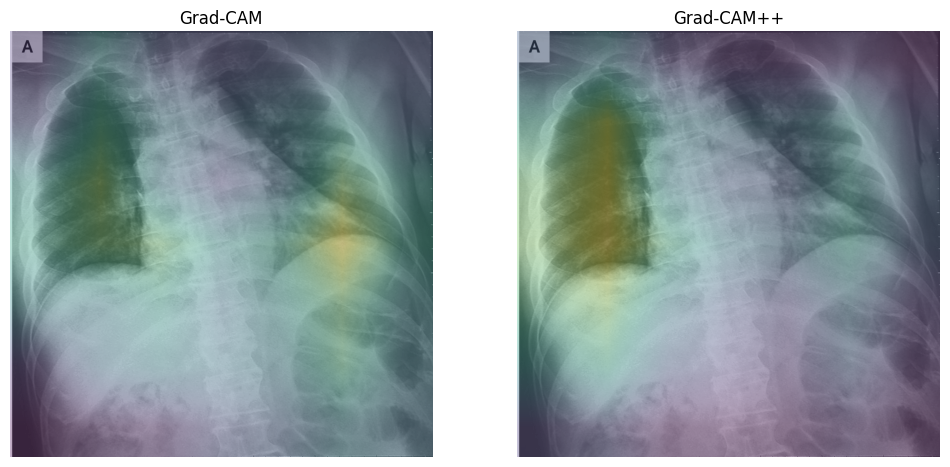

In [92]:
for param in resnet_v.parameters():
    param.requires_grad = True

# Model visualisation with GradCam
sample_pred = infer(resnet_v, sample_img)

# Generate heatmaps using Grad-CAM and Grad-CAM++
heatmap_gc = get_gradcam(resnet_v, sample_pred, sample_img)
heatmap_gcpp = get_gradcam_pp(resnet_v, sample_pred, sample_img)

print("Resnet Classification")
vis_comparison(img_numpy, heatmap_gc, heatmap_gcpp)

Hook registered
Predicted img 0 positive with probability 0.5424
DenseNet Detection


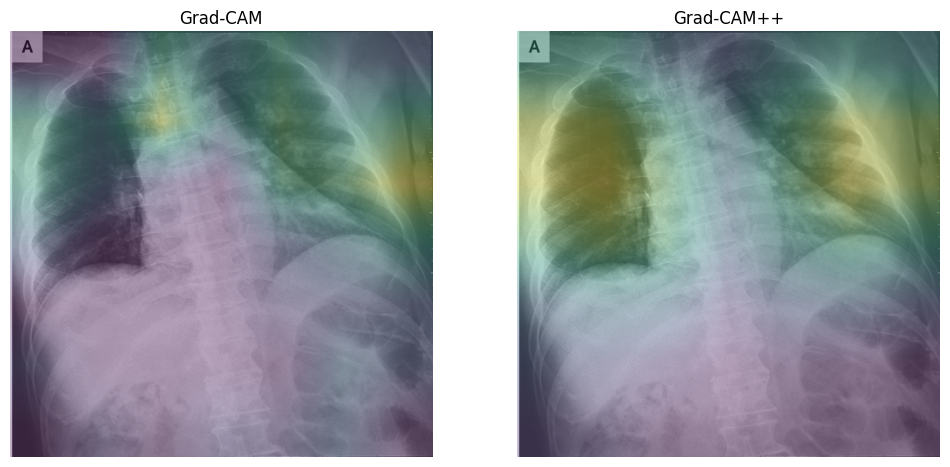

In [93]:
for param in densenet_v.parameters():
    param.requires_grad = True
    
# Model visualisation with GradCam
sample_pred = infer(densenet_v, sample_img)

# Generate heatmaps using Grad-CAM and Grad-CAM++
heatmap_gc = get_gradcam(densenet_v, sample_pred, sample_img)
heatmap_gcpp = get_gradcam_pp(densenet_v, sample_pred, sample_img)

print("DenseNet Detection")
vis_comparison(img_numpy, heatmap_gc, heatmap_gcpp)